In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
data = pd.read_csv(r"D:\assignment qns\Clustering\EastWestAirlines.csv")
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
data.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [8]:
new_column_names = ['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
                    'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
                    'Days_since_enroll', 'Award']

In [9]:
data.columns = new_column_names

In [10]:
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [11]:
data.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

#### Data Preprocessing 

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

In [14]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like median or mode
data_imputed = imputer.fit_transform(data)

In [15]:
# Convert the imputed data back to DataFrame
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)

In [16]:
# Remove outliers using RobustScaler
scaler = RobustScaler()
data_scaled = scaler.fit_transform(data_imputed)

In [17]:
# Convert the scaled data back to DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [22]:
# Summary Statistics
summary_stats = data.describe()
summary_stats

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


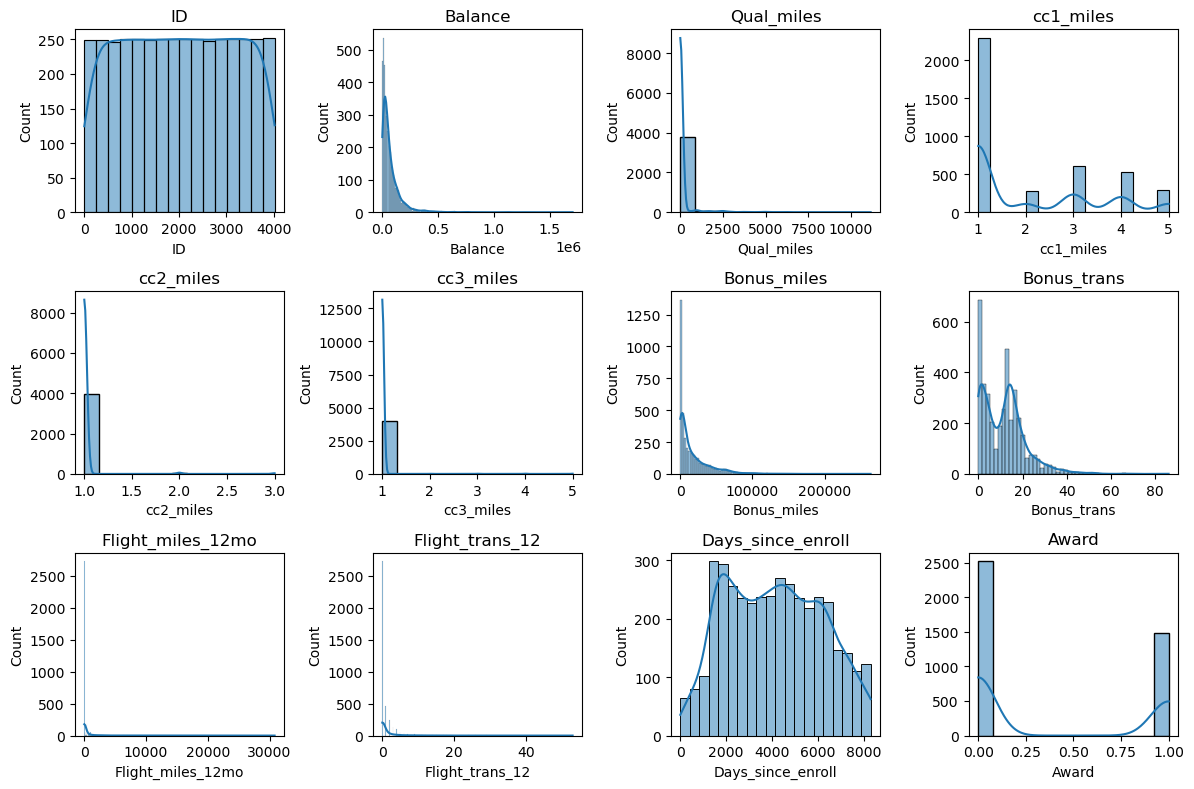

In [23]:
# Univariate Analysis
plt.figure(figsize=(12, 8))
for i, col in enumerate(data.columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

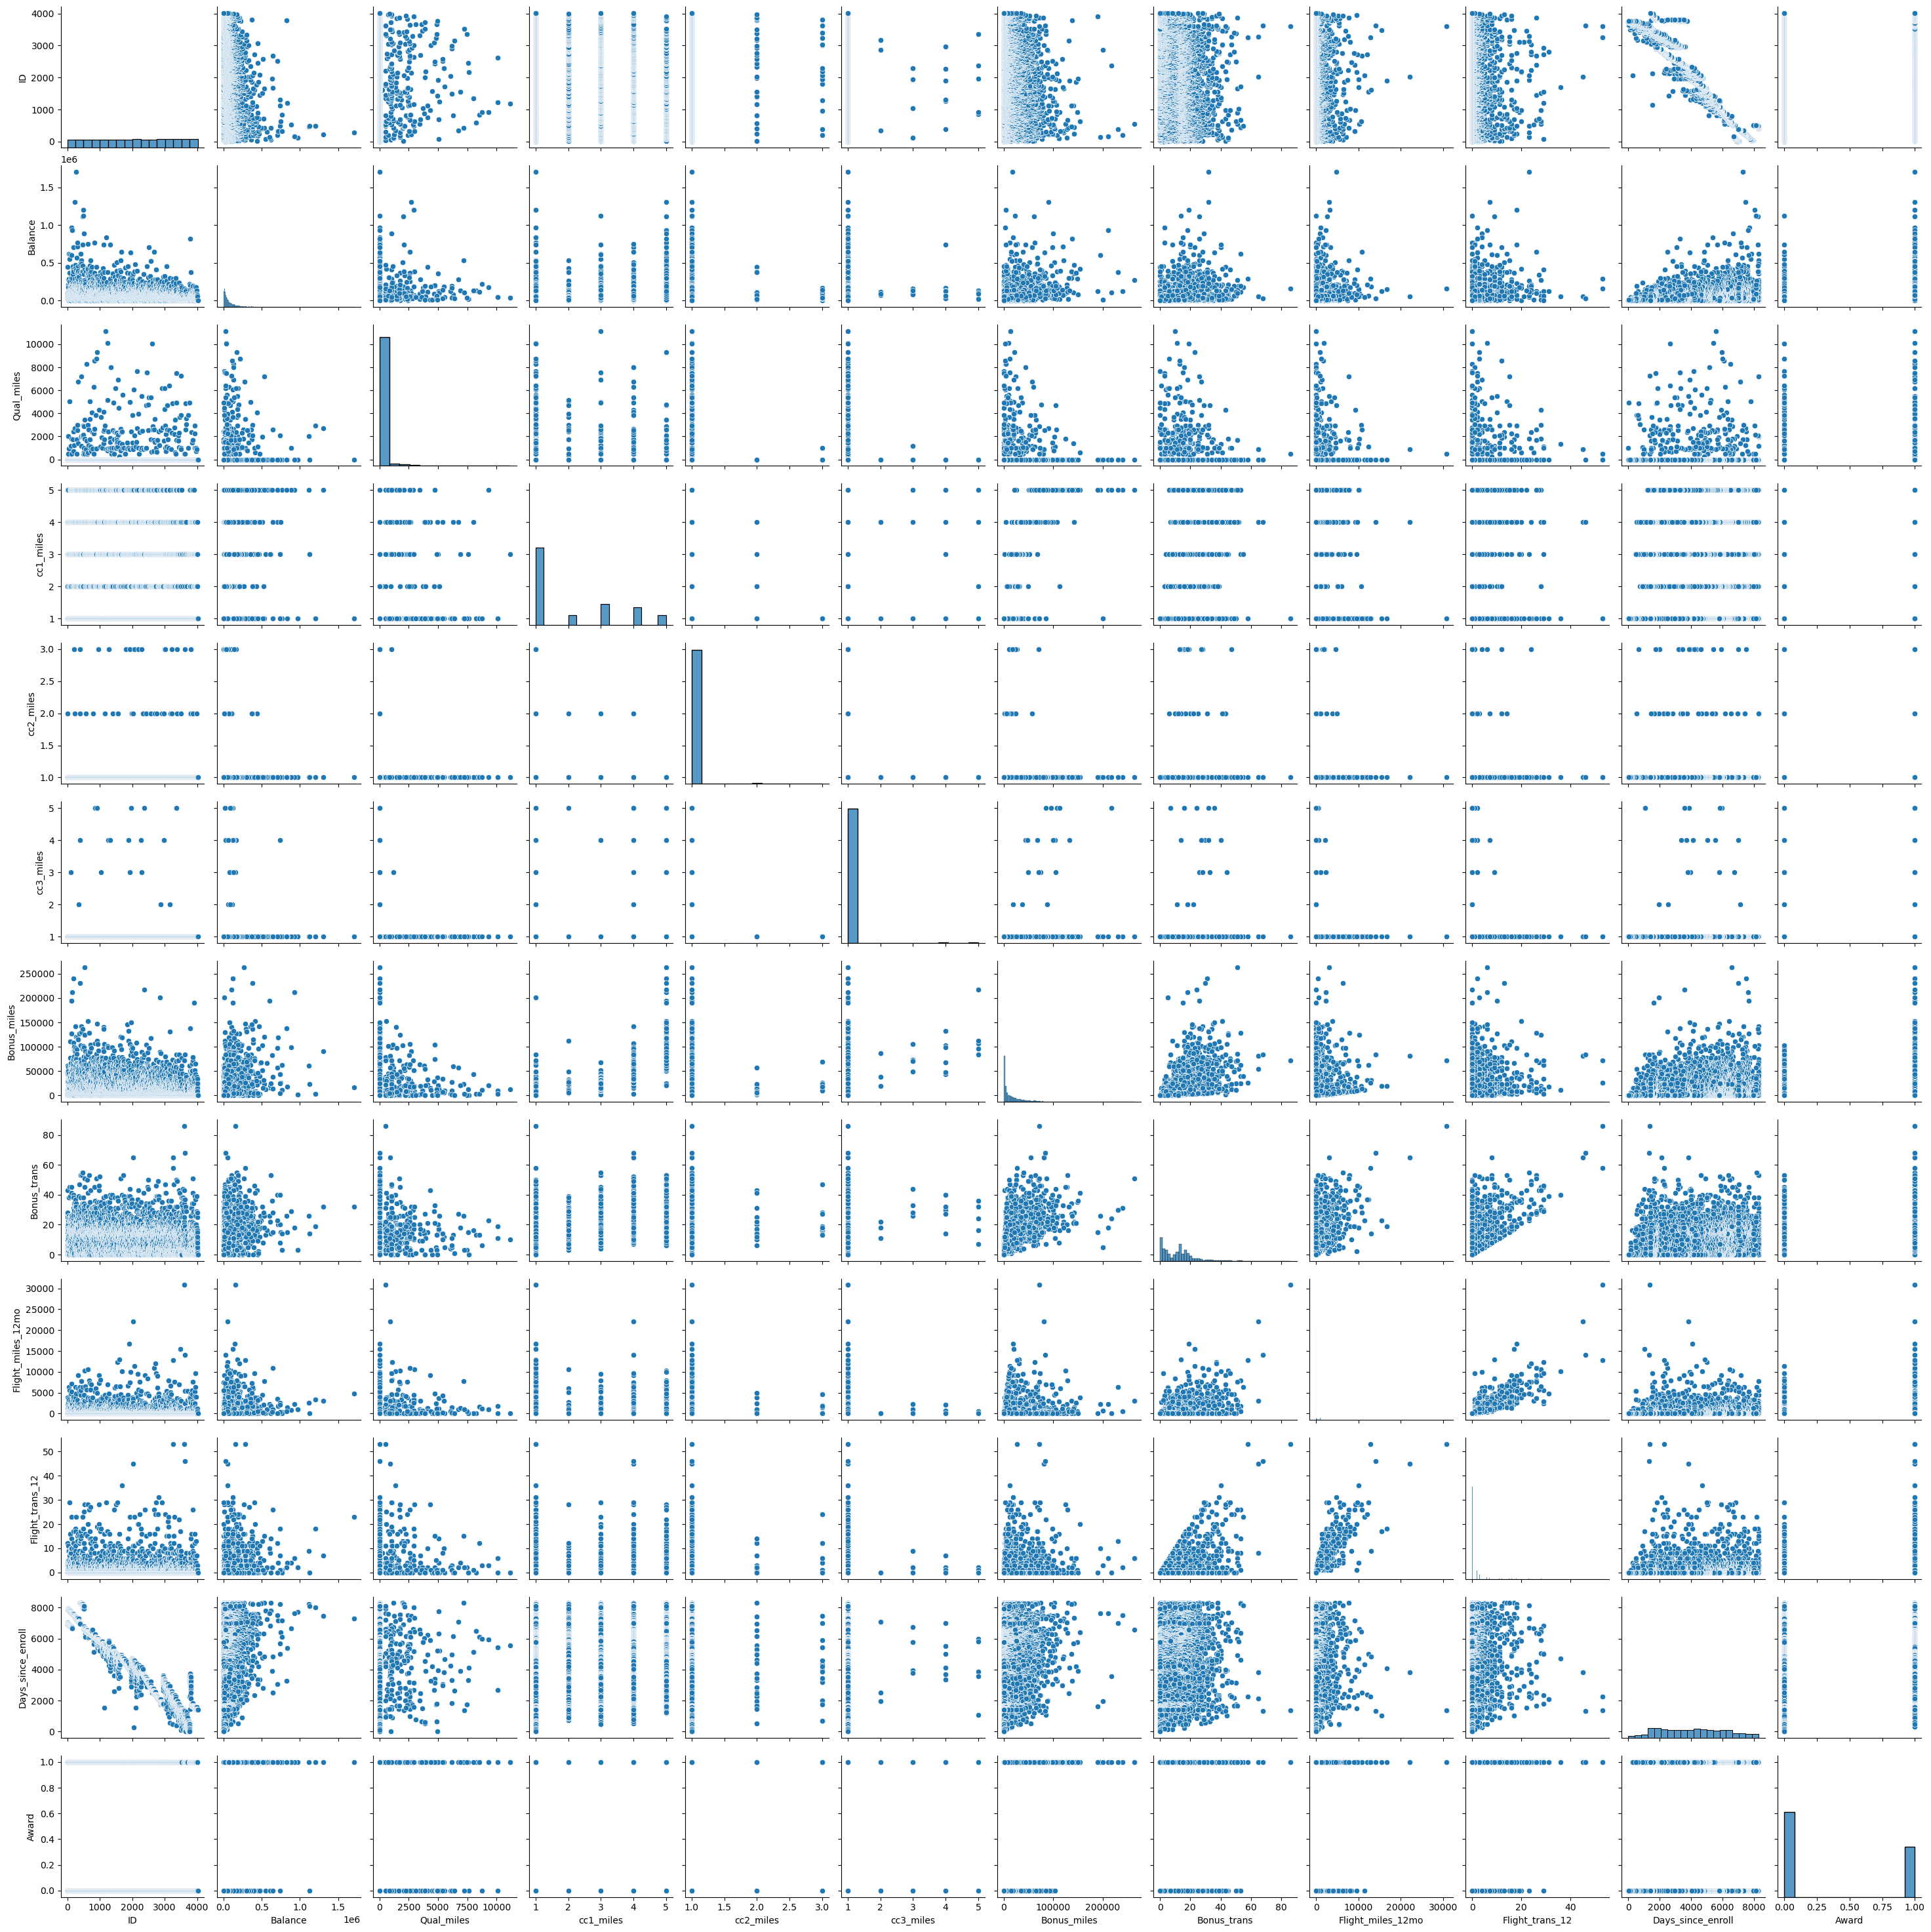

In [24]:
# Bivariate Analysis
sns.pairplot(data)
plt.show()

In [25]:
# Clustering Analysis (Example using K-means)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
data['cluster'] = kmeans.labels_

C:\Users\RAHUL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


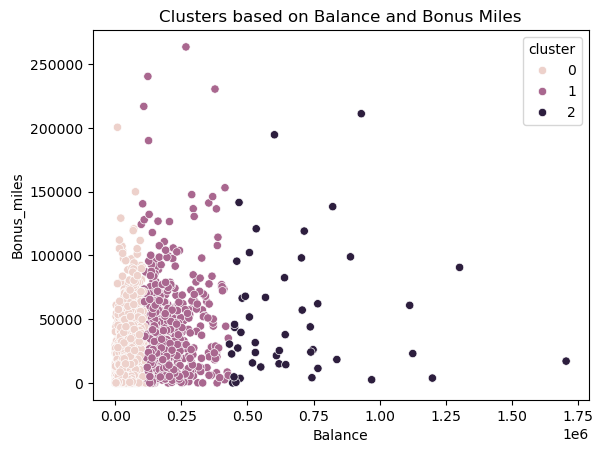

In [26]:
# Visualize clusters
sns.scatterplot(x='Balance', y='Bonus_miles', hue='cluster', data=data)
plt.title('Clusters based on Balance and Bonus Miles')
plt.show()

In [28]:
# Dimensionality Reduction (Example using PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data.drop('cluster', axis=1))

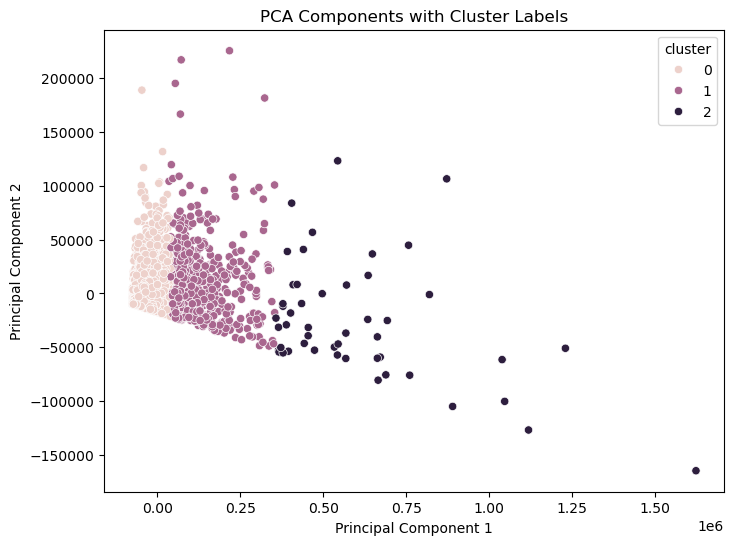

In [29]:
# Visualize PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['cluster'])
plt.title('PCA Components with Cluster Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### Visualizations 

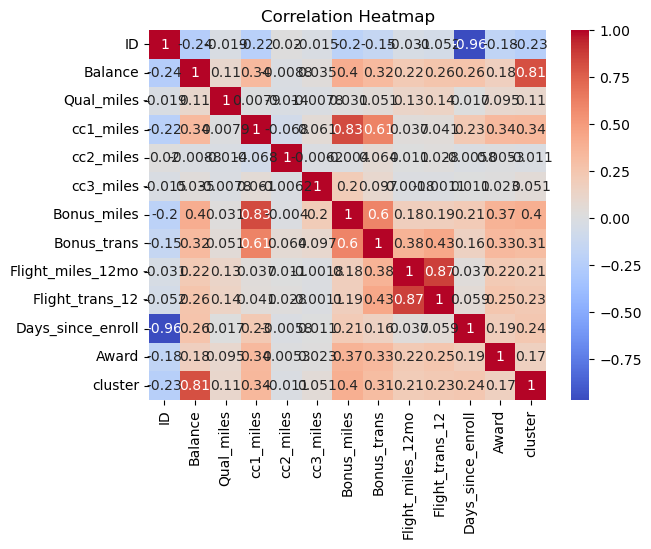

In [30]:
# Heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

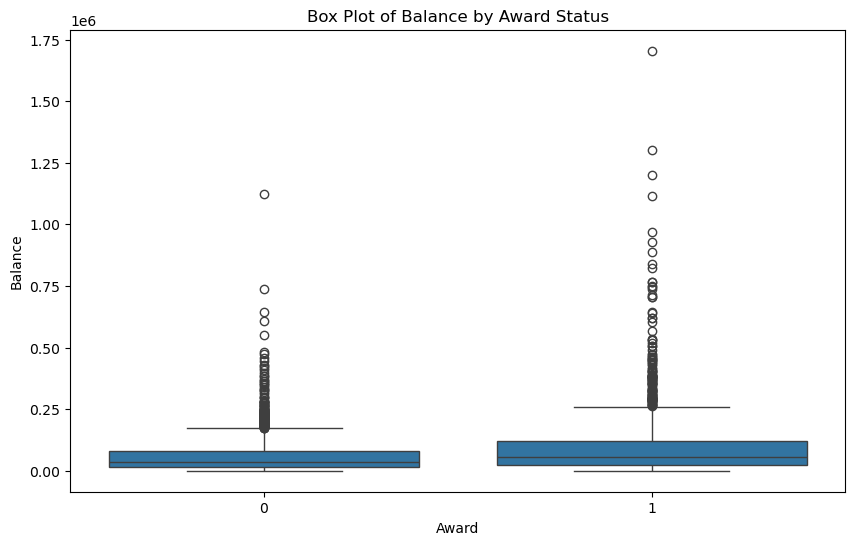

In [31]:
# Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Award', y='Balance', data=data)
plt.title('Box Plot of Balance by Award Status')
plt.show()

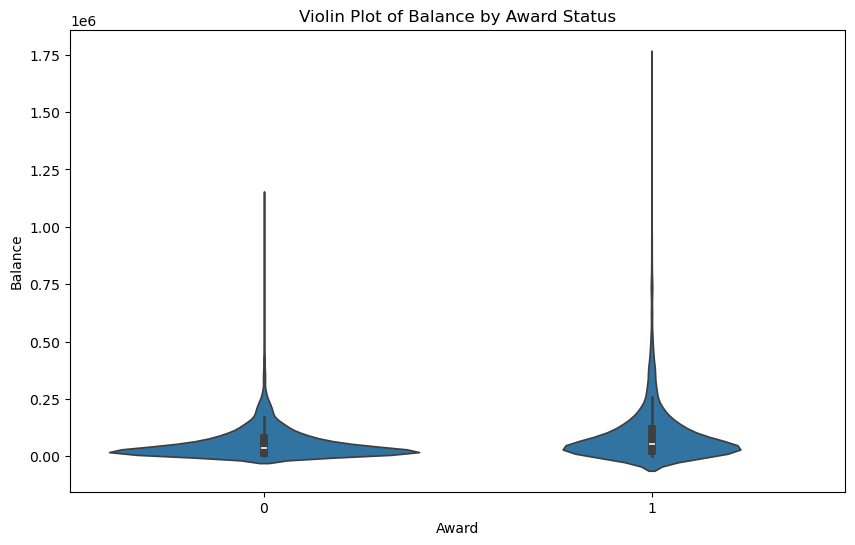

In [32]:
# Violin Plots
plt.figure(figsize=(10, 6))
sns.violinplot(x='Award', y='Balance', data=data)
plt.title('Violin Plot of Balance by Award Status')
plt.show()

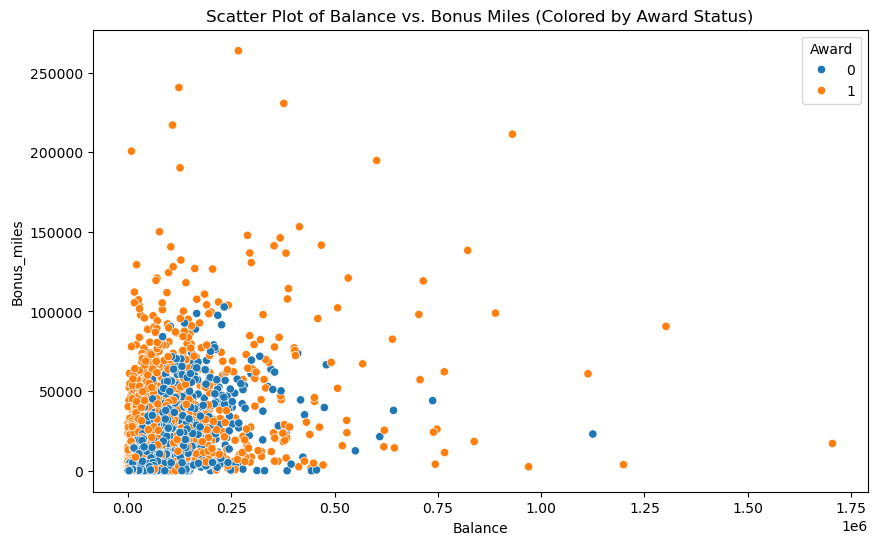

In [33]:
# Scatter Plots with Hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Balance', y='Bonus_miles', hue='Award', data=data)
plt.title('Scatter Plot of Balance vs. Bonus Miles (Colored by Award Status)')
plt.show()

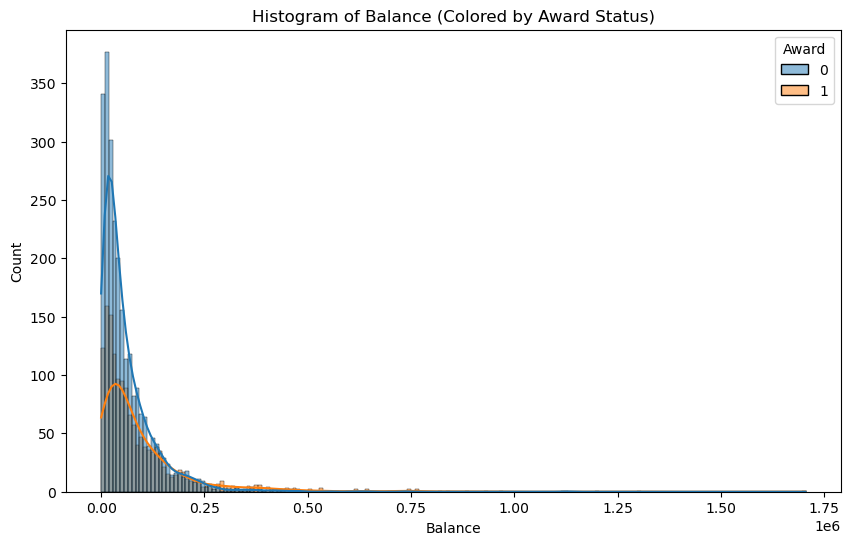

In [34]:
# Histograms with Hue
plt.figure(figsize=(10, 6))
sns.histplot(data, x='Balance', hue='Award', kde=True)
plt.title('Histogram of Balance (Colored by Award Status)')
plt.show()

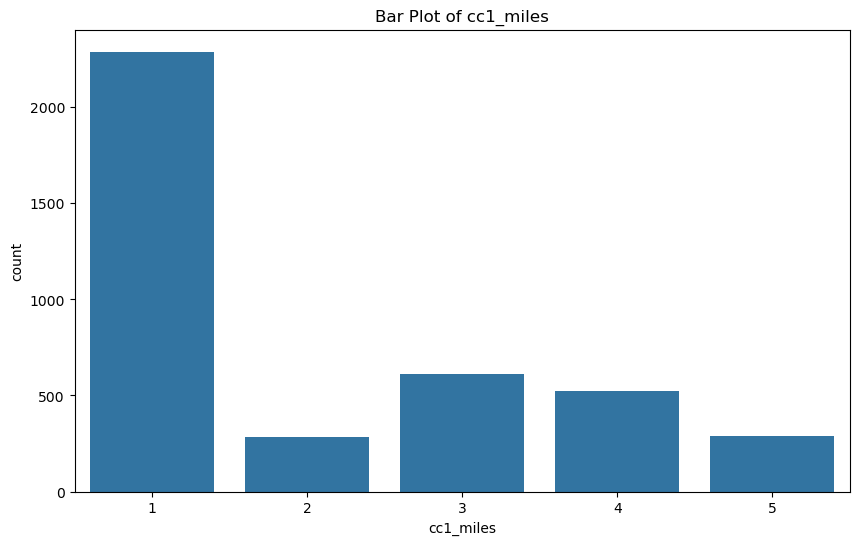

In [35]:
# Bar Plots
plt.figure(figsize=(10, 6))
sns.countplot(x='cc1_miles', data=data)
plt.title('Bar Plot of cc1_miles')
plt.show()

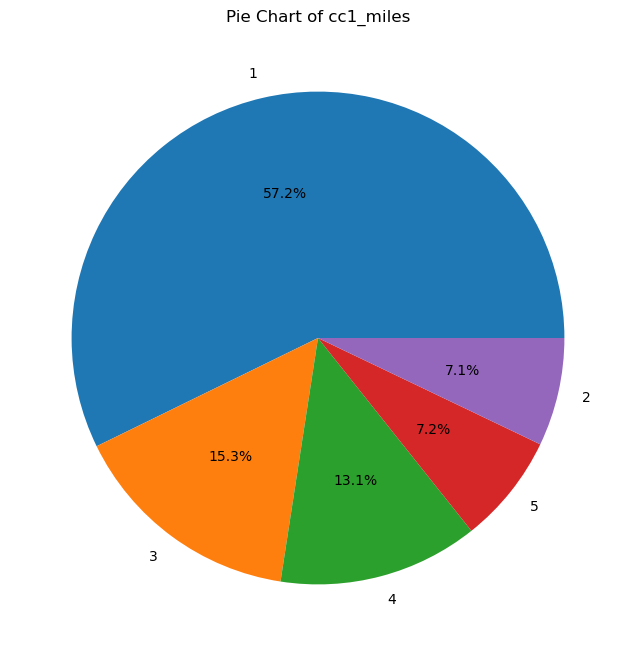

In [37]:
# Pie Chart
plt.figure(figsize=(8, 8))
data['cc1_miles'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of cc1_miles')
plt.ylabel('')
plt.show()

#### implement K-Means, Hierarchical Clustering, and DBSCAN algorithms using Python with scikit-learn

In [40]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler

In [41]:
# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [43]:
# Implement K-Means
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans_labels = kmeans.fit_predict(data_scaled)

In [44]:
# Implement Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchical.fit_predict(data_scaled)

In [45]:
# Implement DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(data_scaled)

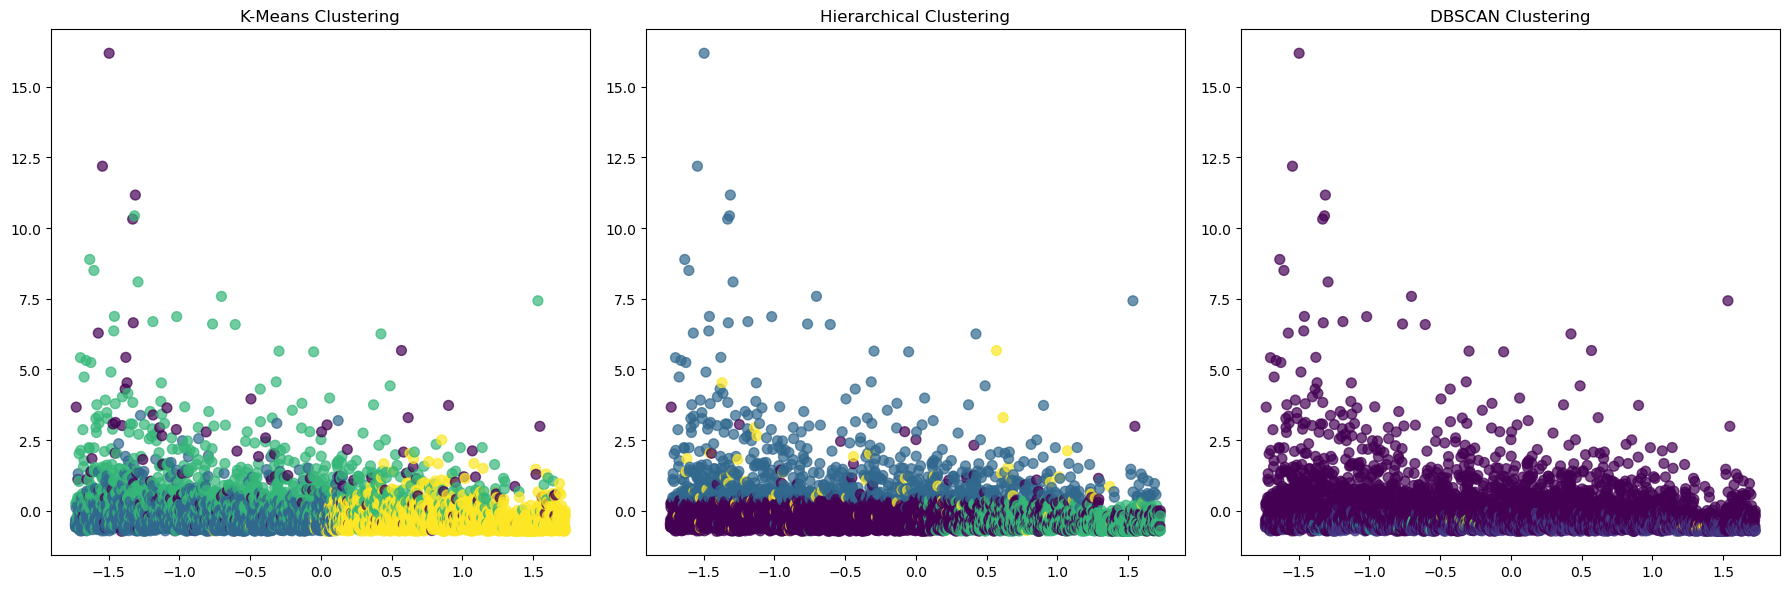

In [59]:
plt.figure(figsize=(18, 6))

# Plot K-Means
plt.subplot(1, 3, 1)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('K-Means Clustering')

# Plot Hierarchical Clustering
plt.subplot(1, 3, 2)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=hierarchical_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('Hierarchical Clustering')

# Plot DBSCAN
plt.subplot(1, 3, 3)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=dbscan_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('DBSCAN Clustering')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [61]:
data['KMeans_Cluster'] = kmeans_labels
data['Hierarchical_Cluster'] = hierarchical_labels
data['DBSCAN_Cluster'] = dbscan_labels

In [68]:
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster,KMeans_Cluster,Hierarchical_Cluster,DBSCAN_Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,2,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,2,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,2,0,-1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,2,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,0,-1


In [69]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [70]:
# Hierarchical Clustering - Experiment with different linkage criteria
linkage_criteria = ['ward', 'complete', 'average', 'single']
for linkage in linkage_criteria:
    hierarchical = AgglomerativeClustering(n_clusters=4, linkage=linkage)
    hierarchical_labels = hierarchical.fit_predict(data_scaled)
    silhouette = silhouette_score(data_scaled, hierarchical_labels)
    db_index = davies_bouldin_score(data_scaled, hierarchical_labels)
    print(f'Linkage: {linkage}, Silhouette Score: {silhouette}, Davies-Bouldin Index: {db_index}')

Linkage: ward, Silhouette Score: 0.14531762680357788, Davies-Bouldin Index: 1.5611373568988278
Linkage: complete, Silhouette Score: 0.5640636596384205, Davies-Bouldin Index: 0.7121167303115653
Linkage: average, Silhouette Score: 0.6827310149748451, Davies-Bouldin Index: 0.694408520853186
Linkage: single, Silhouette Score: 0.702021523432057, Davies-Bouldin Index: 0.2716492963236131


In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame containing the dataset

# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Experiment with different linkage criteria for Hierarchical Clustering
linkage_criteria = ['ward', 'complete', 'average', 'single']
for linkage in linkage_criteria:
    hierarchical = AgglomerativeClustering(n_clusters=4, linkage=linkage)
    hierarchical_labels = hierarchical.fit_predict(data_scaled)
    silhouette = silhouette_score(data_scaled, hierarchical_labels)
    db_index = davies_bouldin_score(data_scaled, hierarchical_labels)
    print(f'Linkage: {linkage}, Silhouette Score: {silhouette}, Davies-Bouldin Index: {db_index}')

Linkage: ward, Silhouette Score: 0.24544177673732917, Davies-Bouldin Index: 1.5019509988674946
Linkage: complete, Silhouette Score: 0.5392626621711621, Davies-Bouldin Index: 0.9694030385145684
Linkage: average, Silhouette Score: 0.7096472882445117, Davies-Bouldin Index: 0.4350937977952499
Linkage: single, Silhouette Score: 0.6395841104200339, Davies-Bouldin Index: 0.21010652760733473


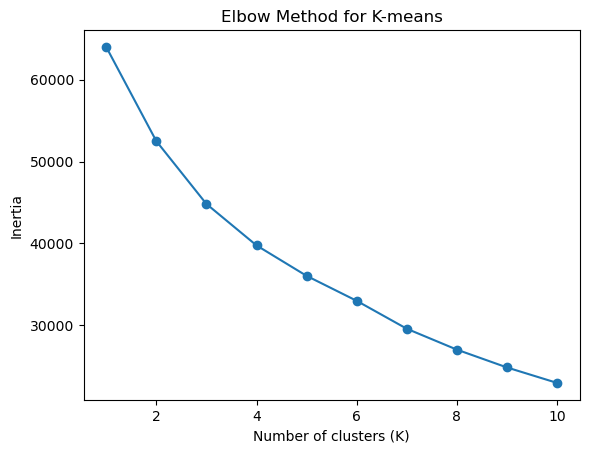

Number of clusters (K): 4, Silhouette Score: 0.27806689027186515, Davies-Bouldin Index: 1.430874232988844


In [77]:
# K-means - Elbow curve for different K values
inertia_values = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Set n_init explicitly
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-means')
plt.show()

# Evaluate clustering results for the optimal K
optimal_k = 4  # Assuming the optimal K is 4 based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)  
kmeans_labels = kmeans.fit_predict(data_scaled)
silhouette = silhouette_score(data_scaled, kmeans_labels)
db_index = davies_bouldin_score(data_scaled, kmeans_labels)
print(f'Number of clusters (K): {optimal_k}, Silhouette Score: {silhouette}, Davies-Bouldin Index: {db_index}')

In [76]:
from sklearn.cluster import DBSCAN

# Experiment with different epsilon and minPts values for DBSCAN
epsilon_values = [0.1, 0.2, 0.3, 0.4]
min_samples_values = [5, 10, 15, 20]
for eps in epsilon_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(data_scaled)
        if len(set(dbscan_labels)) > 1:  # Check if DBSCAN generated more than one cluster
            silhouette = silhouette_score(data_scaled, dbscan_labels)
            db_index = davies_bouldin_score(data_scaled, dbscan_labels)
            print(f'Epsilon: {eps}, MinPts: {min_samples}, Silhouette Score: {silhouette}, Davies-Bouldin Index: {db_index}')

Epsilon: 0.1, MinPts: 5, Silhouette Score: -0.2841066237997021, Davies-Bouldin Index: 1.1126791285997404
Epsilon: 0.1, MinPts: 10, Silhouette Score: -0.2802969062130266, Davies-Bouldin Index: 1.0694254679815096
Epsilon: 0.1, MinPts: 15, Silhouette Score: -0.07306439933757079, Davies-Bouldin Index: 0.9838070217036087
Epsilon: 0.1, MinPts: 20, Silhouette Score: -0.04774705764041599, Davies-Bouldin Index: 0.9467326790562027
Epsilon: 0.2, MinPts: 5, Silhouette Score: -0.2587389096810235, Davies-Bouldin Index: 1.077511886991788
Epsilon: 0.2, MinPts: 10, Silhouette Score: -0.23688153969272044, Davies-Bouldin Index: 1.608492101150092
Epsilon: 0.2, MinPts: 15, Silhouette Score: -0.24349924169755913, Davies-Bouldin Index: 1.3738067971175572
Epsilon: 0.2, MinPts: 20, Silhouette Score: -0.2333350342789932, Davies-Bouldin Index: 1.1696120511219432
Epsilon: 0.3, MinPts: 5, Silhouette Score: -0.22734482718657445, Davies-Bouldin Index: 1.2764964727671584
Epsilon: 0.3, MinPts: 10, Silhouette Score: -0

In [80]:
cluster_data.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster,KMeans_Cluster,Hierarchical_Cluster,DBSCAN_Cluster
count,19.000000,19.000000,19.0,19.0,19.0,19.0,19.000000,19.000000,19.0,19.0,19.000000,19.0,19.0,19.0,19.0,19.0
mean,3548.526316,12774.578947,0.0,1.0,1.0,1.0,3665.947368,20.368421,0.0,0.0,1262.736842,0.0,0.0,0.0,2.0,5.0
std,82.102489,4500.631947,0.0,0.0,0.0,0.0,902.078924,1.977949,0.0,0.0,228.214042,0.0,0.0,0.0,0.0,0.0
min,3289.000000,7625.000000,0.0,1.0,1.0,1.0,3000.000000,17.000000,0.0,0.0,863.000000,0.0,0.0,0.0,2.0,5.0
25%,3544.500000,9750.000000,0.0,1.0,1.0,1.0,3269.500000,19.000000,0.0,0.0,1114.000000,0.0,0.0,0.0,2.0,5.0
50%,3573.000000,11631.000000,0.0,1.0,1.0,1.0,3375.000000,20.000000,0.0,0.0,1393.000000,0.0,0.0,0.0,2.0,5.0
75%,3600.500000,13325.500000,0.0,1.0,1.0,1.0,3625.000000,22.000000,0.0,0.0,1409.000000,0.0,0.0,0.0,2.0,5.0
max,3618.000000,23717.000000,0.0,1.0,1.0,1.0,7164.000000,24.000000,0.0,0.0,1599.000000,0.0,0.0,0.0,2.0,5.0


We first apply each clustering algorithm to the pre-processed dataset.
Then, we analyze each cluster generated by each algorithm by printing the descriptive statistics (e.g., mean, standard deviation, minimum, maximum) of the data points within each cluster.
Finally, we interpret the characteristics of each cluster based on the insights gained from the descriptive statistics.

In [84]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler


# Evaluate clustering results using silhouette score and Davies-Bouldin index
metrics = {'Hierarchical Clustering': hierarchical_labels, 'K-means Clustering': kmeans_labels, 'DBSCAN Clustering': dbscan_labels}
for title, labels in metrics.items():
    if len(set(labels)) > 1:
        silhouette = silhouette_score(data_scaled, labels)
        db_index = davies_bouldin_score(data_scaled, labels)
        print(f'{title}: Silhouette Score: {silhouette}, Davies-Bouldin Index: {db_index}')
    else:
        print(f'{title}: Clustering failed to generate more than one cluster.')

Hierarchical Clustering: Silhouette Score: 0.24544177673732917, Davies-Bouldin Index: 1.5019509988674946
K-means Clustering: Silhouette Score: 0.27806689027186515, Davies-Bouldin Index: 1.430874232988844
DBSCAN Clustering: Silhouette Score: -0.014213472742295357, Davies-Bouldin Index: 0.8867189359011036


In [85]:
from sklearn.metrics import silhouette_score

# K-means
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
print(f"Silhouette Score for K-means: {kmeans_silhouette}")

# DBSCAN
# Note: DBSCAN does not inherently provide a silhouette score, but we can still evaluate the clustering
# based on its ability to separate noise points from dense regions.
# We can calculate the silhouette score only for points not labeled as noise (-1)
dbscan_silhouette = silhouette_score(data_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
print(f"Silhouette Score for DBSCAN: {dbscan_silhouette}")

Silhouette Score for K-means: 0.27806689027186515
Silhouette Score for DBSCAN: 0.623420651006541
